In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\Vai.Mathi\Downloads\archive (2)\Amazon Fine Food Reviews.csv")

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df = df.head(500)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# **Exploratory Data Analysis**


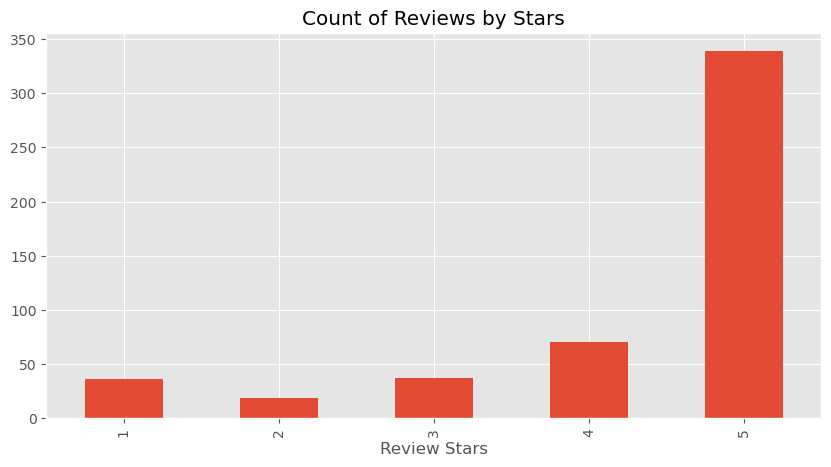

In [6]:
ax = df['Score'].value_counts().sort_index().plot(kind = 'bar', title = 'Count of Reviews by Stars', figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

# **VADER Sentiment Scoring**


In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [8]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

# Convert the res dictionary to a DataFrame
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})

# Merge with the original DataFrame
vaders = vaders.merge(df, how='left', left_on='id', right_on='Id')

# Display the resulting DataFrame
display(vaders.head())

  0%|          | 0/500 [00:00<?, ?it/s]

,id,neg,neu,pos,compound,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


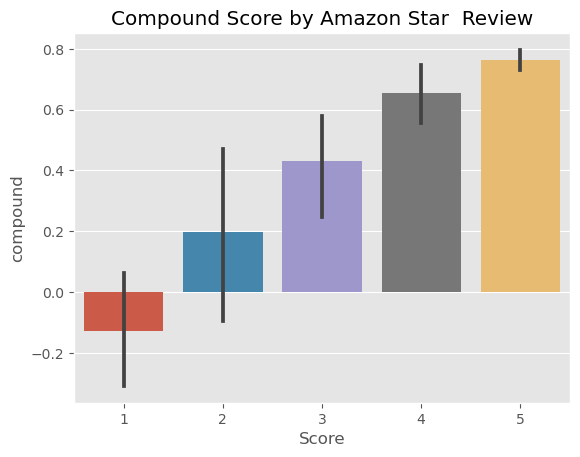

In [9]:
ax = sns.barplot(data=vaders, x = 'Score', y = 'compound')
ax.set_title('Compound Score by Amazon Star  Review')
plt.show()

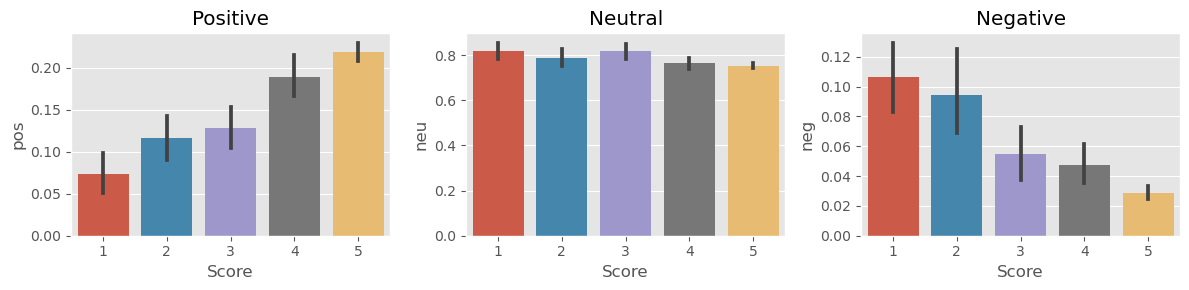

In [10]:
fig, axs = plt.subplots(1,3, figsize=(12,3))
sns.barplot(data = vaders, x='Score', y = 'pos', ax = axs[0])
sns.barplot(data = vaders, x='Score', y = 'neu', ax = axs[1])
sns.barplot(data = vaders, x='Score', y = 'neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# **Roberta Pretrained Model**

In [11]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import os
os.environ['HF_HUB_DISABLE_SYMLINKS_WARNING'] = '1'


In [12]:
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [13]:
example = df['Text'][50]
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {'roberta_neg': scores[0], 'roberta_neu': scores[1], 'roberta_pos': scores[2]}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687453, 'roberta_pos': 0.0029573678}


In [14]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {'roberta_neg': scores[0], 'roberta_neu': scores[1], 'roberta_pos': scores[2]}
    return scores_dict
        

In [15]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try: 
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key,value in vader_result.items():
            vader_result_rename[f"vader{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id{myid}')
        
    

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id83
Broke for id187


In [16]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [17]:
results_df.columns

Index(['Id', 'vaderneg', 'vaderneu', 'vaderpos', 'vadercompound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

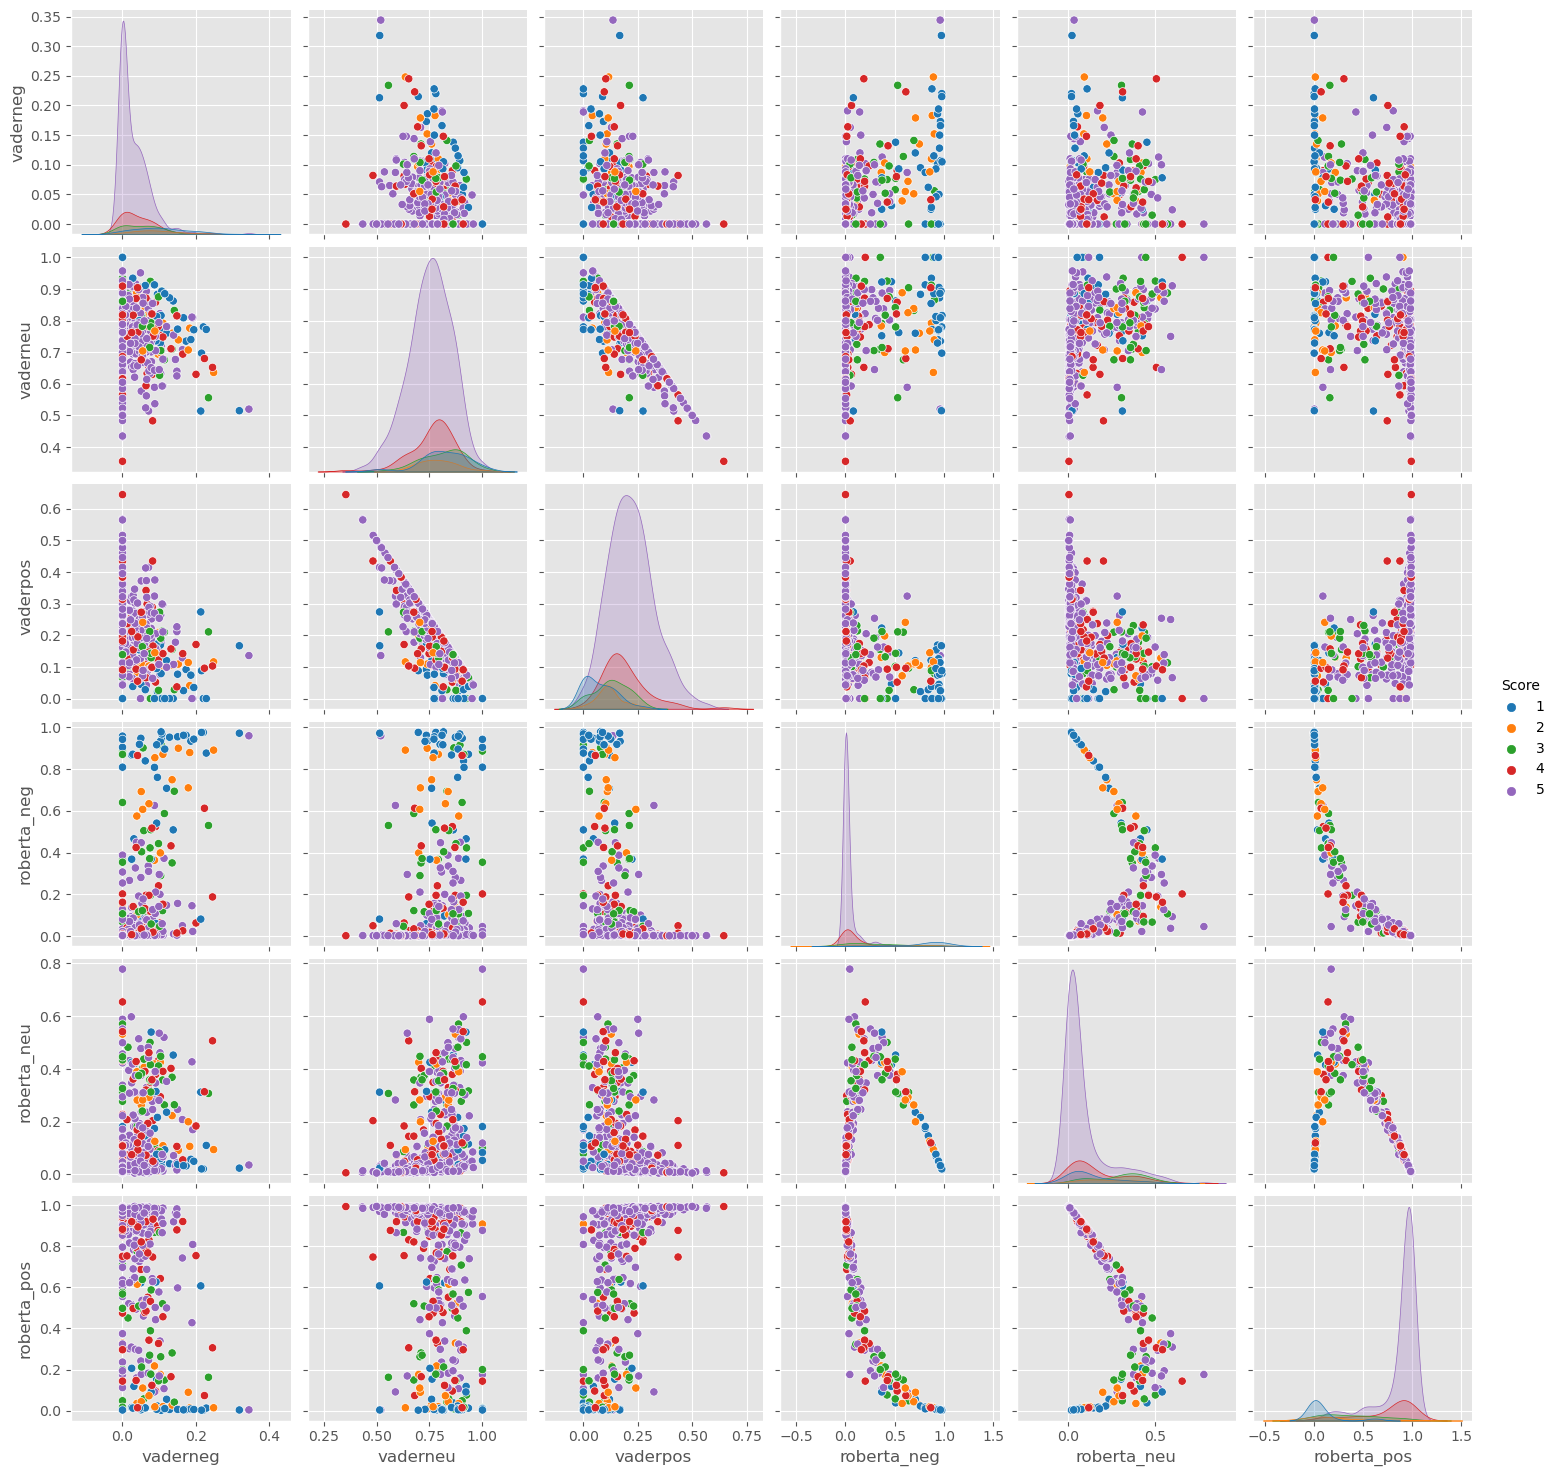

In [18]:
sns.pairplot(data = results_df, vars = ['vaderneg', 'vaderneu', 'vaderpos', 'roberta_neg', 'roberta_neu', 'roberta_pos'], hue = 'Score', palette='tab10')
plt.show()

# **Reviewing Outlier Examples**

In [19]:

results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]


'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [20]:
results_df.query('Score == 1').sort_values('vaderpos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [21]:
results_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [22]:
results_df.query('Score == 5').sort_values('vaderneg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# **Creating Prediction Algorithms**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch

# Label the data based on star ratings
def label_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

df['true_sentiment'] = df['Score'].apply(label_sentiment)

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# VADER Sentiment Analysis
sia = SentimentIntensityAnalyzer()
train_df['vader_sentiment'] = train_df['Text'].apply(lambda x: 'positive' if sia.polarity_scores(x)['compound'] > 0 else 'negative')
test_df['vader_sentiment'] = test_df['Text'].apply(lambda x: 'positive' if sia.polarity_scores(x)['compound'] > 0 else 'negative')

# Load RoBERTa model and tokenizer
MODEL = 'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

def roberta_sentiment(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    scores = outputs[0][0].detach().numpy()
    scores = softmax(scores)
    sentiment = ['negative', 'neutral', 'positive']
    return sentiment[scores.argmax()]

train_df['roberta_sentiment'] = train_df['Text'].apply(roberta_sentiment)
test_df['roberta_sentiment'] = test_df['Text'].apply(roberta_sentiment)

# Calculate metrics for VADER on test data
vader_accuracy = accuracy_score(test_df['true_sentiment'], test_df['vader_sentiment'])
vader_precision = precision_score(test_df['true_sentiment'], test_df['vader_sentiment'], average='weighted')
vader_recall = recall_score(test_df['true_sentiment'], test_df['vader_sentiment'], average='weighted')
vader_f1 = f1_score(test_df['true_sentiment'], test_df['vader_sentiment'], average='weighted')

# Calculate metrics for RoBERTa on test data
roberta_accuracy = accuracy_score(test_df['true_sentiment'], test_df['roberta_sentiment'])
roberta_precision = precision_score(test_df['true_sentiment'], test_df['roberta_sentiment'], average='weighted')
roberta_recall = recall_score(test_df['true_sentiment'], test_df['roberta_sentiment'], average='weighted')
roberta_f1 = f1_score(test_df['true_sentiment'], test_df['roberta_sentiment'], average='weighted')

# Store the metrics in a dictionary
metrics = {
    'Model': ['VADER', 'RoBERTa'],
    'Accuracy': [vader_accuracy, roberta_accuracy],
    'Precision': [vader_precision, roberta_precision],
    'Recall': [vader_recall, roberta_recall],
    'F1 Score': [vader_f1, roberta_f1]
}

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(metrics)

# Display the DataFrame
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,VADER,0.820000,0.759111,0.820000,0.788163
1,RoBERTa,0.866667,0.871708,0.866667,0.869011
